# Self-organizing maps

#### Group members: 
##### Anirudh S Chakravarthy : 2017A7PS1195P
##### Divyam Goel : 2017A7PS1196P
##### S Hariharan : 2017A7PS0134P

A self-organizing map is a type of Artificial Neural Network that is used to perform Unsupervised Learning that is used to reduce the data to a lower-dimensional space (map).

We require three libraries to run this code.\
numpy is used for matrix and array representation and computations.\
matplotlib is used to display the output results in a visual format.\
tensorflow is used to obtain the MNIST handwritten digit dataset.

In [12]:
# necessary imports:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf    # for importing the MNIST dataset
%matplotlib inline

Self-organizing maps have a few variable features about them.\
The main ones are the dimensions of the SOM and the size of the neighbourhood.\
In this implementation we have used a rectangular grid for the SOM architecture.

In [4]:
# settings for our self-organizing map

som_dimensions = (12,12)  # dimensions of the SOM <= (rows, cols)
som_rectangular_grid_radius = 2  # size of the neighbourhood the SOM considers when doing the update
training_set_size = 2000  # number of samples we use from the training set
num_epochs = 300    # number of iterations of the algorithm we wish to run
learning_rate = 0.05  # learning rate (alpha)
mnist_size = 28 # dimensions of the images, do not change.

The following cell represents a class that is used to make an instance of a SOM.\
We have the methods \_\_init\_\_ and train() available to the user

In [5]:
# class definition of our self-organizing map, all operations will be done on an instance
class SOM():
    
    # init method acts as a constructor to our instance
    def __init__(self):
        # make a Kohonen layer and initialize all the neurons with random weights
        self.kohonen = np.random.rand(som_dimensions[0]*som_dimensions[1]*mnist_size**2)
        self.kohonen = np.reshape(self.kohonen, (som_dimensions[0], som_dimensions[1], mnist_size, mnist_size))
        print(self.kohonen.shape)
    
    # method to train our SOM
    def train(self, x_train):
        i = 1
        while i <= num_epochs:
            print('Training on epoch {}'.format(i), end='... ', flush=True)
            self._train_one_epoch(x_train)
            print('Epoch {} complete'.format(i), flush=True)
            i += 1            
        print('Training complete.', flush=True)
    
    def _train_one_epoch(self, x_train):
        point = [-1,-1]
        for vector in x_train:
            min_dist = np.Infinity
            for i in range(som_dimensions[0]):
                for j in range(som_dimensions[1]):
#                     dist = np.sqrt(np.sum((vector.reshape(-1, mnist_size) - self.kohonen[i][j]) ** 2))
                    dist = np.linalg.norm(vector.reshape(-1, mnist_size) - self.kohonen[i][j])
                    if dist < min_dist:
                        min_dist = dist
                        point = [i, j]
        
            self._update_weights(point, vector)
        
    def _update_weights(self, point, vector):
        
        def isValidPoint(point):
            if point[0] < 0 or point[0] >= som_dimensions[0]:
                return False
            elif point[1] < 0 or point[1] >= som_dimensions[1]:
                return False
            return True
        
        x_diff = -som_rectangular_grid_radius
        # change weights of all points in the neighborhood
        while x_diff <= som_rectangular_grid_radius:
            y_diff = -som_rectangular_grid_radius
            
            while y_diff <= som_rectangular_grid_radius:
                if isValidPoint([point[0]+x_diff, point[1]+y_diff]):
                    # update weights
                    delta = vector.reshape(-1, mnist_size) - self.kohonen[point[0]+x_diff][point[1]+y_diff]
                    self.kohonen[point[0]+x_diff][point[1]+y_diff] += learning_rate * delta
                y_diff += 1
            
            x_diff += 1

The following cell obtains the MNIST dataset through tensorflow. Note that we don't need the y_train values as the SOM algorithm is unsupervised, but it's still obtained for consistency.

In [6]:
# using tensorflow's default MNIST library
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)


x_train = mnist.train.images[:training_set_size,:]    
y_train = mnist.train.labels[:training_set_size,:]

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [7]:
# checking if the dataset loaded correctly
# for the MNIST dataset each element in the x_train array is a 28*28=784 size one-dimensional array
print(x_train.shape)
print(type(x_train[0][0]))

(2000, 784)
<class 'numpy.float32'>


And now we create an instance of a SOM, and train it with our data we obtained from MNIST.

In [8]:
# creating an instance of our SOM class, this will be used to perform operations
train_SOM = SOM()
# training our SOM
train_SOM.train(x_train)

(12, 12, 28, 28)
Training on epoch 1... Epoch 1 complete
Training on epoch 2... Epoch 2 complete
Training on epoch 3... Epoch 3 complete
Training on epoch 4... Epoch 4 complete
Training on epoch 5... Epoch 5 complete
Training on epoch 6... Epoch 6 complete
Training on epoch 7... Epoch 7 complete
Training on epoch 8... Epoch 8 complete
Training on epoch 9... Epoch 9 complete
Training on epoch 10... Epoch 10 complete
Training on epoch 11... Epoch 11 complete
Training on epoch 12... Epoch 12 complete
Training on epoch 13... Epoch 13 complete
Training on epoch 14... Epoch 14 complete
Training on epoch 15... Epoch 15 complete
Training on epoch 16... Epoch 16 complete
Training on epoch 17... Epoch 17 complete
Training on epoch 18... Epoch 18 complete
Training on epoch 19... Epoch 19 complete
Training on epoch 20... Epoch 20 complete
Training on epoch 21... Epoch 21 complete
Training on epoch 22... Epoch 22 complete
Training on epoch 23... Epoch 23 complete
Training on epoch 24... Epoch 24 co

Training on epoch 192... Epoch 192 complete
Training on epoch 193... Epoch 193 complete
Training on epoch 194... Epoch 194 complete
Training on epoch 195... Epoch 195 complete
Training on epoch 196... Epoch 196 complete
Training on epoch 197... Epoch 197 complete
Training on epoch 198... Epoch 198 complete
Training on epoch 199... Epoch 199 complete
Training on epoch 200... Epoch 200 complete
Training on epoch 201... Epoch 201 complete
Training on epoch 202... Epoch 202 complete
Training on epoch 203... Epoch 203 complete
Training on epoch 204... Epoch 204 complete
Training on epoch 205... Epoch 205 complete
Training on epoch 206... Epoch 206 complete
Training on epoch 207... Epoch 207 complete
Training on epoch 208... Epoch 208 complete
Training on epoch 209... Epoch 209 complete
Training on epoch 210... Epoch 210 complete
Training on epoch 211... Epoch 211 complete
Training on epoch 212... Epoch 212 complete
Training on epoch 213... Epoch 213 complete
Training on epoch 214... Epoch 2

Now that our SOM has finished training, we get to visualize our output. The output image shows our rectangular grid layout of the Kohonen layer in an image form.

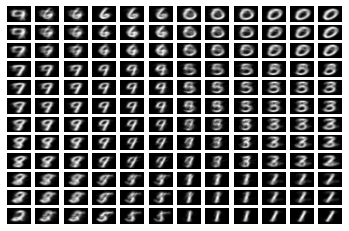

<Figure size 7200x7200 with 0 Axes>

In [11]:
# visualizing results using matplotlib:
fig, axs = plt.subplots(nrows=som_dimensions[0], ncols=som_dimensions[1])
plt.axis('off')
plt.xticks(color='w')
plt.yticks(color='w')
plt.figure(figsize=(100,100))

# for i in range(som_dimensions[0]):
#     for j in range(som_dimensions[1]):
#         axs[i, j].imshow(train_SOM.kohonen[i][j], aspect='auto', cmap='gray')

i=0
for row in axs:
    j=0
    for col in row:
        col.imshow(train_SOM.kohonen[i][j], aspect = 'auto', cmap='gray')
        col.axis('off')
        j += 1
    i += 1
        
plt.show()